In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
import dateutil
#import datetime as dt

In [137]:
df= pd.read_csv('D:/MachineLearning/municipality_bus_utilization.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [138]:
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [139]:
df.describe()

,municipality_id,usage,total_capacity
count,13070.000000,13070.000000,13070.000000
mean,4.500000,876.002984,1972.800000
std,2.872391,679.287109,1144.074782
min,0.000000,11.000000,397.000000
25%,2.000000,403.000000,697.000000
50%,4.500000,692.000000,1974.500000
75%,7.000000,1190.000000,2947.000000
max,9.000000,3508.000000,3893.000000


In [140]:
df.isnull().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [141]:
from pandas import DataFrame


df['timestamp'] = pd.to_datetime(df['timestamp'])
df['municipality_id']=df.municipality_id.astype('object')
df['total_capacity']=df.total_capacity.astype('object')
df2=df.set_index(['timestamp'])


In [142]:
df2=df2.groupby(['municipality_id','total_capacity']).resample("H").sum()

df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18340 entries, (0, 2813, Timestamp('2017-06-04 07:00:00', freq='H')) to (9, 1332, Timestamp('2017-08-19 16:00:00', freq='H'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   usage   18340 non-null  int64
dtypes: int64(1)
memory usage: 294.7 KB


In [143]:
df2

usage
municipality_id total_capacity timestamp                 
0               2813           2017-06-04 07:00:00    204
                               2017-06-04 08:00:00    579
                               2017-06-04 09:00:00    914
                               2017-06-04 10:00:00   1117
                               2017-06-04 11:00:00   1211
...                                                   ...
9               1332           2017-08-19 12:00:00   1650
                               2017-08-19 13:00:00   1837
                               2017-08-19 14:00:00   1962
                               2017-08-19 15:00:00   1930
                               2017-08-19 16:00:00   1694

[18340 rows x 1 columns]

In [144]:
df3=df2.reset_index()
df3

,municipality_id,total_capacity,timestamp,usage
0,0,2813,2017-06-04 07:00:00,204
1,0,2813,2017-06-04 08:00:00,579
2,0,2813,2017-06-04 09:00:00,914
3,0,2813,2017-06-04 10:00:00,1117
4,0,2813,2017-06-04 11:00:00,1211
...,...,...,...,...
18335,9,1332,2017-08-19 12:00:00,1650
18336,9,1332,2017-08-19 13:00:00,1837
18337,9,1332,2017-08-19 14:00:00,1962
18338,9,1332,2017-08-19 15:00:00,1930


In [145]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18340 entries, 0 to 18339
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   municipality_id  18340 non-null  int64         
 1   total_capacity   18340 non-null  int64         
 2   timestamp        18340 non-null  datetime64[ns]
 3   usage            18340 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 573.2 KB


from numpy import mean
for row in (df3.municipality_id):
    plt.figure()
    sns.lineplot(x=col,y=df3['usage'].mean(),data=df3,color='Red')
    sns.barplot(x=col,y="usage",data=df3,estimator=mean)
    plt.show()

for col in (df3.columns):
    plt.figure()
    sns.lineplot(x=col,y=df3['usage'].mean(),data=df3,color='Red')
    sns.barplot(x=col,y="usage",data=df3,estimator=mean)
    plt.show()

In [146]:
df2.agg(['mean','max','min','median'])

,usage
mean,624.283479
max,11492.000000
min,0.000000
median,0.000000


## Handling Missing values

C:\Users\torlago\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='usage', ylabel='Density'>

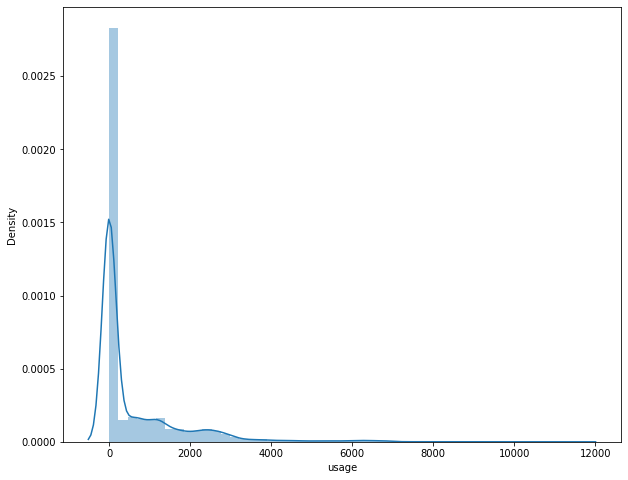

In [147]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df3['usage'])

In [148]:
df3_col = df3['usage']
df3_col.replace(to_replace = 0, value = df3_col.mean(), inplace=True)
df3['usage']=df3_col

In [149]:
df3['usage'].agg(['mean','max','min','median'])

mean       1019.141077
max       11492.000000
min          16.000000
median      624.283479
Name: usage, dtype: float64

In [150]:
days=df3['timestamp'].astype('datetime64[D]')
df3['days']=days.dt.day_name()
df3['days']=df3['days'].astype('string')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18340 entries, 0 to 18339
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   municipality_id  18340 non-null  int64         
 1   total_capacity   18340 non-null  int64         
 2   timestamp        18340 non-null  datetime64[ns]
 3   usage            18340 non-null  float64       
 4   days             18340 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(1)
memory usage: 716.5 KB


In [151]:
df4= df3.groupby('municipality_id').agg(['mean','max','min'])['usage']
df4

C:\Users\torlago\AppData\Local\Temp\ipykernel_17600\816383801.py:1: FutureWarning:

['days'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,mean,max,min
municipality_id,,,
0,787.216377,4182.0,79.0
1,607.277991,1771.0,61.0
2,741.914305,2946.0,197.0
3,1163.282353,5632.0,267.0
4,2038.590968,11492.0,481.0
5,517.062615,1414.0,16.0
6,1125.908852,7102.0,399.0
7,1213.897947,6962.0,510.0
8,1123.004272,5903.0,352.0


In [152]:
import plotly.express as px

fig = px.bar(df4, x=df4.index, y='mean',hover_data=['mean', df4.index], 
             color='mean',orientation='v',title='Based on municipality_id')
fig.show()


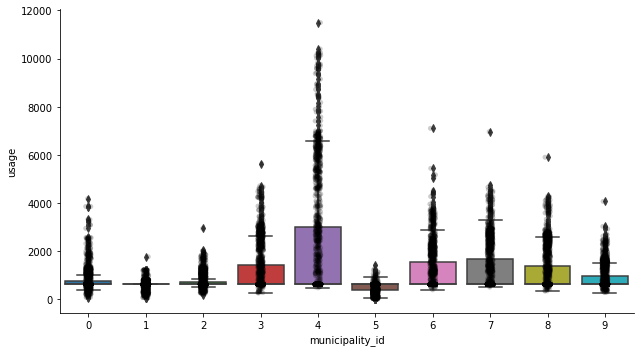

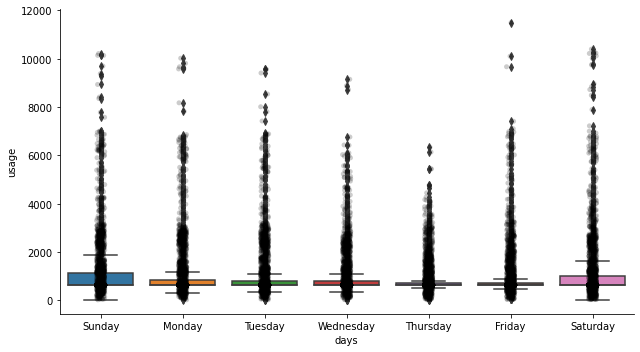

In [153]:
discrete_vars =['municipality_id','days']
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='usage', data=df3, kind="box", height=5, aspect=1.8)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='usage', data=df3, jitter=0.05, alpha=0.2, color='k')
    plt.show()

In [154]:
df5=df3.groupby('days').agg(['mean','max','min'])['usage']
df5

,mean,max,min
days,,,
Friday,969.372948,11492.0,34.0
Monday,1067.207859,10020.0,20.0
Saturday,1102.959036,10395.0,29.0
Sunday,1123.795483,10212.0,20.0
Thursday,862.440560,6333.0,16.0
Tuesday,1042.111015,9561.0,23.0
Wednesday,971.098011,9146.0,20.0


In [155]:
import plotly.express as px

fig = px.bar(df5, x='mean', y=df5.index.sort_values(),hover_data=['mean', df5.index], 
             color='mean',orientation='h',title='Based on week days')
fig.show()

In [156]:
capacity_usage=df3.usage/df3.total_capacity
capacity_usage.agg(['mean','max','min','median','var'])

mean      0.688079
max       4.460957
min       0.027257
median    0.468681
var       0.282725
dtype: float64

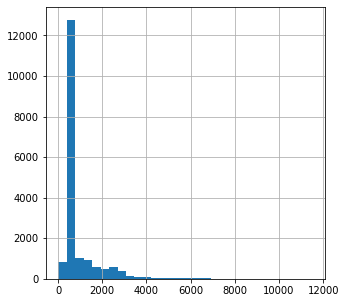

In [157]:
# lets plot histograms for continuous variable

df3['usage'].hist(bins=30, figsize=(5,5))
plt.show()

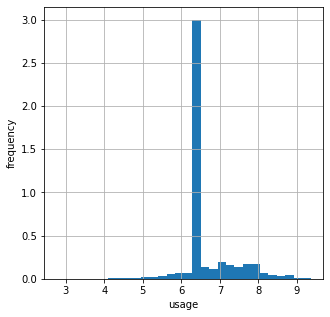

In [158]:
np.log(df3.usage).hist(bins=30, density=True,figsize=(5,5))
plt.ylabel('frequency')
plt.xlabel('usage')
plt.show()

In [159]:
df3.columns

Index(['municipality_id', 'total_capacity', 'timestamp', 'usage', 'days'], dtype='object')

In [160]:
muni=pd.get_dummies(df3['municipality_id'],prefix='munici',sparse=True)
df3=pd.concat([muni,df3],axis=1,join="inner")
df3.head(5)

,munici_0,munici_1,munici_2,munici_3,munici_4,munici_5,munici_6,munici_7,munici_8,munici_9,municipality_id,total_capacity,timestamp,usage,days
0,1,0,0,0,0,0,0,0,0,0,0,2813,2017-06-04 07:00:00,204.0,Sunday
1,1,0,0,0,0,0,0,0,0,0,0,2813,2017-06-04 08:00:00,579.0,Sunday
2,1,0,0,0,0,0,0,0,0,0,0,2813,2017-06-04 09:00:00,914.0,Sunday
3,1,0,0,0,0,0,0,0,0,0,0,2813,2017-06-04 10:00:00,1117.0,Sunday
4,1,0,0,0,0,0,0,0,0,0,0,2813,2017-06-04 11:00:00,1211.0,Sunday


In [161]:
df_final= df3.drop(columns=['total_capacity','days','municipality_id'],axis=1)

df_final['usage'] = np.log(df_final['usage'])
df_final = df_final.sort_values(by='timestamp')

In [162]:
# Let's separate into train and test set
#last 2 week will be treated sperately therefore it will be removed delibaretely from test and train set  


Xdf3_2w= df_final.drop(columns=['usage'],axis=1)
ydf3_2w=df_final[df_final['timestamp']> '2017-08-05' ].iloc[:,-1]
print('y values, Extracted and reserved last 14 days for final test:')

ydf3_2w
print('------------------------------------')
print('X values, Extracted and reserved last 14 days for final test:')
Xdf3_2w=Xdf3_2w[Xdf3_2w['timestamp']> '2017-08-05']

Xdf3_2w['timestamp']=pd.to_numeric(Xdf3_2w['timestamp'])

y values, Extracted and reserved last 14 days for final test:
------------------------------------
X values, Extracted and reserved last 14 days for final test:


In [163]:
#these data will be used for training and test purposes
Xdf3_ext=df_final.drop(columns=['usage'],axis=1)
Xdf3_ext=Xdf3_ext[Xdf3_ext['timestamp']< '2017-08-05']
print('X values, Extracted and reserved last 14 days for final test:',Xdf3_ext)
Xdf3_ext['timestamp']=pd.to_numeric(Xdf3_ext['timestamp'])
print('------------------------------------')
print('y values, Extracted and reserved last 14 days for final test:')
ydf3_ext= df_final[df_final['timestamp']< '2017-08-05' ].iloc[:,-1]
ydf3_ext

X values, Extracted and reserved last 14 days for final test:        munici_0  munici_1  munici_2  munici_3  munici_4  munici_5  munici_6  \
0             1         0         0         0         0         0         0   
9170          0         0         0         0         0         1         0   
5502          0         0         0         1         0         0         0   
11004         0         0         0         0         0         0         1   
3668          0         0         1         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
12484         0         0         0         0         0         0         1   
16152         0         0         0         0         0         0         0   
14318         0         0         0         0         0         0         0   
17986         0         0         0         0         0         0         0   
3314          0         1         0         0         0         0    

0        5.318120
9170     4.248495
5502     6.434547
11004    6.391917
3668     5.609472
           ...   
12484    6.436605
16152    6.436605
14318    6.436605
17986    6.436605
3314     6.436605
Name: usage, Length: 14810, dtype: float64

In [164]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xdf3_ext,ydf3_ext ,
    test_size=0.30, # portion of dataset to allocate to test set
    random_state=42, # we are setting the seed here
)

X_train.shape, X_test.shape

((10367, 11), (4443, 11))

In [165]:
y_train.shape,y_test.shape

((10367,), (4443,))

## test with a simple model

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [167]:
clf = RandomForestRegressor(n_estimators = 50, n_jobs = -1,random_state=42)
clf.fit(X_train, y_train)

C:\Users\torlago\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:624: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [168]:
accuracy = clf.score(X_test, y_test)
print(f'accuracy is found for baseline model: {accuracy}')


accuracy is found for baseline model: 0.7466498047653567


C:\Users\torlago\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:624: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [169]:
rf_pred_train=clf.predict(X_train)
rf_pred_test=clf.predict(X_test)

C:\Users\torlago\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:624: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

C:\Users\torlago\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:624: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



In [170]:
from sklearn.metrics import r2_score
r_sq_train=r2_score(rf_pred_train,y_train)
r_sq_train

0.9592559459730172

In [171]:
r_sq_test=r2_score(rf_pred_test,y_test)
r_sq_test

0.7023497104376066

## test with a complex model

In [172]:
import tensorflow as tf

In [173]:
# Set random seed
from matplotlib import units


tf.random.set_seed(42)


model = tf.keras.Sequential([
  tf.keras.layers.Dense(11,activation='relu'), 
  tf.keras.layers.Dense(121,activation="relu"),
  tf.keras.layers.Dense(66,activation="relu"),
  tf.keras.layers.Dense(11,activation="sigmoid"), 
  tf.keras.layers.Dense(1,activation="relu"), 
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = model.fit(X_train, y_train, epochs=300, batch_size=32,verbose=0)

In [174]:
y_pred2=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [175]:
y_pred2.shape

(4443, 1)

In [176]:
y_test.shape

(4443,)

In [177]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred2.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.330999>

In [178]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred2.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.4418947>

In [179]:
model_loss, model_mae = model.evaluate(X_test, y_test)

139/139 [==============================] - 1s 4ms/step - loss: 0.3310 - mae: 0.3310


In [180]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred2.squeeze()):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

## Final Prediction by using last 2 weeks dataset

In [184]:
Xdf3_2w.shape,ydf3_2w.shape

((3520, 11), (3520,))

In [185]:
final_pred=model.predict(Xdf3_2w)

In [186]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=ydf3_2w, 
                                     y_pred=final_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.39808214>

In [191]:
y_final_prediction=pd.DataFrame(final_pred,columns=['final_Prediction'],index=ydf3_2w.index)

In [193]:
comparision=pd.concat([y_final_prediction,ydf3_2w],axis=1,join="inner")
comparision

,final_Prediction,usage
17988,6.437598,6.436605
12486,6.437598,6.436605
5150,6.437598,6.436605
6984,6.437598,6.436605
8818,6.437598,6.436605
...,...,...
5501,6.437598,7.028201
3667,6.437598,6.680855
1833,6.437598,7.842671
16505,6.437598,7.802209
